In [19]:
!pip install numpy
!pip install pandas
!pip install scipy
!pip install matplotlib

/nix/store/ddx7976jyll30xjbasghv9jailswprcp-bash-interactive-5.3p3/bin/bash: line 1: pip: command not found
/nix/store/ddx7976jyll30xjbasghv9jailswprcp-bash-interactive-5.3p3/bin/bash: line 1: pip: command not found
/nix/store/ddx7976jyll30xjbasghv9jailswprcp-bash-interactive-5.3p3/bin/bash: line 1: pip: command not found
/nix/store/ddx7976jyll30xjbasghv9jailswprcp-bash-interactive-5.3p3/bin/bash: line 1: pip: command not found


# 1. [15 points] 
A researcher has collected hourly data of air quality index (AQI) measurements over a period
of one month in a city. The data is available in the Data directory on Canvas (aqi measurements.csv). The
data may contain noise due to instrument calibration issues or sudden environmental changes. Plot the
time series of the AQI measurements. Identify any periods where the data appears to be noisy or contains
anomalies.

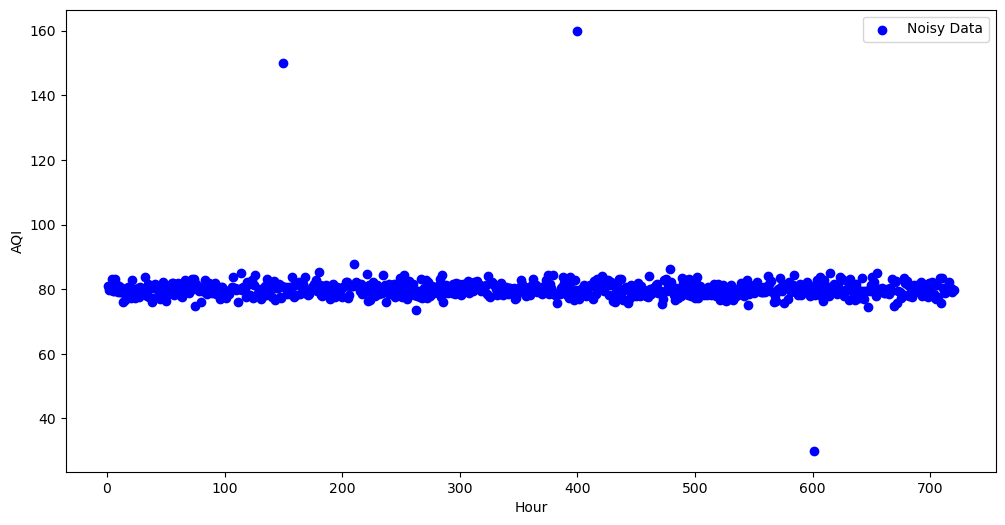

In [18]:
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv("aqi_measurements.csv")

plt.figure(figsize=(12, 6))
plt.scatter(df['Hour'], df['AQI'], color='blue', label="Noisy Data")
plt.xlabel('Hour')
plt.ylabel('AQI')
plt.legend()
plt.show()

It looks like at hours ~150 ~400 and ~600 there are significant outliers in the data.

# 2. [35 points] 
A company claims that defects in their manufactured widgets occur at a constant rate of 5%
across all production shifts (morning, afternoon, night). An auditor suspects that noise in the production
process may be causing variations in defect rates.
The auditor collects the following data on defective widgets over one week:
- Morning Shift: 50 defects out of 900 widgets
- Afternoon Shift: 60 defects out of 1000 widgets
- Night Shift: 40 defects out of 800 widgets
## Tasks:
- (a) [5 points] State the null and alternative hypotheses for a Chi-Square Goodness-of-Fit test in this
context.
- (b) [10 points] Calculate the expected number of defects for each shift based on the company’s claim.
- (c) [10 points] Perform the Chi-Square Goodness-of-Fit test to determine if there is a significant difference
between observed and expected defects.
- (d) [10 points] Interpret the results and conclude whether the variations in defect rates are due to random
noise or indicate a significant deviation from the expected rate.


## 2.A
- **Null Hypotheses**: The amount of defects in each shift fit the distruibution of exepcted rate of defects in a shift.
- **Alternative Hypothesis**: The amount of defects do not fit the exected distribution of defects in a shift.

## 2.B & 2.C

In [15]:
from scipy.stats import chisquare
import numpy as np

shift_totals = np.array([ 900, 1000, 800 ])
observed_defects = np.array([ 50, 60, 40 ])
expected_percentages = np.array([.05, .05, .05])
expected_defects = expected_percentages * shift_totals
expected_defects = np.sum(observed_defects)/np.sum(expected_defects) * expected_defects

total_defects = sum(observed_defects)
time = [ "morning", "afternoon", "night" ]
expected_error = .05

for i, expected in enumerate(expected_defects):
    print(f"Expected {time[i]} defects: {expected}")

# Perform Chi-Square Goodness-of-Fit Test
chi_stat, p_value = chisquare(f_obs=observed_defects, f_exp=expected_defects)

print(f"Chi-Square Statistic: {chi_stat:.4f}")
print(f"P-value: {p_value:.4f}")

Expected morning defects: 50.0
Expected afternoon defects: 55.55555555555556
Expected night defects: 44.44444444444444
Chi-Square Statistic: 0.8000
P-value: 0.6703


## 2.D

The critical value for 2 degrees of freedom in the chi-square table is 5.991 so we fail to reject the null hypothesis. This means that the defects are most likely just noise and there are no significant issues in widget production.

# 3. [30 points] 
You are provided with a dataset containing the exam scores (out of 100) of 50 students in a
CS course.
- Scores: [78, 85, 92, 88, 91, 73, 95, 89, 77, 14, 79, 90, 83, 87, 0, 0, 81, 86, 93, 80,
82, 88, 85, 89, 92, 75, 84, 90, 88, 83, 79, 77, 148, 250, 87, 85, 82, 88, 90, 84,
10, 78, 85, 89, 87, 92, 80, 83, 85, 100, 81]

## Tasks
- (a) [5 points] Draw the box plot and identify the outliers.
- (b) [10 points] Identify any outliers in the dataset using the Z-score method. What range of Z-scores do
you think should be considered outliers’ ?
1
- (c) [5 points] Do Z-score and box plot deliver the same outliers?
- (d) [10 points] What could be the source of the outliers in this dataset?

## 3.A

Q1: 80.0, Q3: 89.0, IQR: 9.0
Lower bound :66.5, Upper bound :102.5
    value outlier
9      14     Yes
14      0     Yes
15      0     Yes
32    148     Yes
33    250     Yes
40     10     Yes


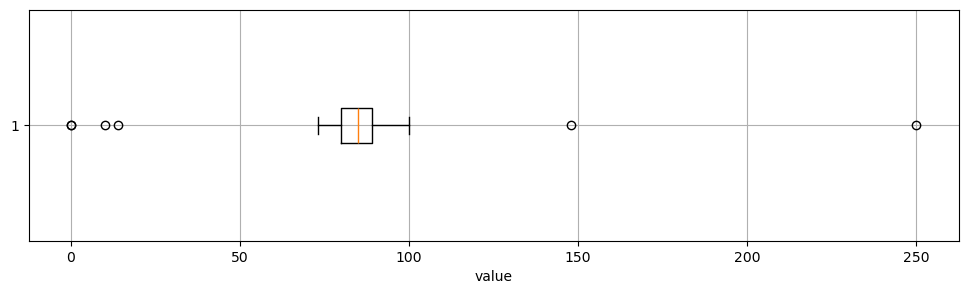

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
data = {"value": [78, 85, 92, 88, 91, 73, 95, 89, 77, 14, 79, 90, 83, 87, 0, 0, 81, 86, 93, 80, 82, 88, 85, 89, 92, 75, 84, 90, 88, 83, 79, 77, 148, 250, 87, 85, 82, 88, 90, 84, 10, 78, 85, 89, 87, 92, 80, 83, 85, 100, 81]}

df = pd.DataFrame(data)
# Calculate Q1, Q3, and IQR
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
df['outlier'] = df['value'].apply(lambda x: 'Yes' if x < lower_bound or x > upper_bound else 'No')

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower bound :{lower_bound}, Upper bound :{upper_bound}")
outliers = df[df['outlier'] == 'Yes']
print(outliers)
plt.figure(figsize=(12, 3))
plt.boxplot(df['value'], vert=False,whis = 1.5)
#plt.title('Boxplot of Values')
plt.xlabel('value')
plt.grid(True)
plt.show()

## 3.B

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

data = {"value": [78, 85, 92, 88, 91, 73, 95, 89, 77, 14, 79, 90, 83, 87, 0, 0, 81, 86, 93, 80, 82, 88, 85, 89, 92, 75, 84, 90, 88, 83, 79, 77, 148, 250, 87, 85, 82, 88, 90, 84, 10, 78, 85, 89, 87, 92, 80, 83, 85, 100, 81]}

df = pd.DataFrame(data)
zscores = df.apply(zscore)
df['Z-score'] = zscore(df['value'])
outliers = df[df['Z-score'].abs() > 1.5]
print(outliers)

    value   Z-score
9      14 -2.067330
14      0 -2.483947
15      0 -2.483947
32    148  1.920289
33    250  4.955641
40     10 -2.186364


- I think the zscore range should be anything above +-1.5 standard deviations becuase that is what gets both the 148 value and the 250 value which are impossible test scores.

## 3.C
- Both zscores and the box plot method both deliever the same outliers.


## 3.D

- What could be the source of the outliers in this dataset?
  - My thought is that becuase this is a set of exame scores that means that there should be no score above 100. However there are 2 of these. I believe these would have to be misinput by the indivudal who inputted the data. The 0's mean that the student got NO questions right which is not probable so I'd imagine they missed the test for some reason. They other lower scores are students who just did really bad.

# 4. [20 points]

## A.
a. Which of the following is NOT a common method for handling missing data in a dataset?
- [ ] Deleting rows with missing values
- [ ] Imputing missing values using mean of median
- [x] Randomly assigning values to missing data
- [ ] Replacing missing values with zeros

b. Which imputation method involves using algorithms to predict missing values based on other available variables?
- [ ] Mean imputation
- [ ] Listwise deletion
- [ ] Multiple imputation
- [x] Pairwise deletion

c. Which of the following statements about duplicate data is TRUE?
- [ ] Duplicates always occur due to data entry errors.
- [x] Duplicates can never be useful and should always be removed
- [ ] Removing duplicates can reduce data reduncdancy
- [ ] Duplicates have no impact on data analysis results

d. When dealing with duplicates, which of the following is a best practice?
- [ ] Always remove the first occurrence of the duplicate
- [ ] Keep all duplicates to ensure data integrity
- [x] Examine duplicates before deciding to remove or keep them
- [ ] Randomly select duplicates to delete

e. What is the primary risk of imputing missing values with the mean of the observed data?
- [ ] It can introduce bias into the dataset
- [ ] It reduces the dataset's size
- [x] It increases the variance of the data
- [ ] It is computationally intensive
    